In [1]:
import pypsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/networkclustering.py:16: UserWarning: The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 
  warnings.warn(


In [2]:
# initialize network
n = pypsa.Network()

/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas.

In [3]:
# use 24 hour period for consideration
index = pd.date_range("2024-01-01 00:00", "2024-01-01 23:00", freq="H")
n.set_snapshots(index)

/var/folders/c3/657p__892k72qxh6r8fdkqsh0000gn/T/ipykernel_93910/1932511106.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index = pd.date_range("2024-01-01 00:00", "2024-01-01 23:00", freq="H")


In [4]:
np.random.seed(10)  # for reproducibility

# time-varying inputs for generator, link and load
p_nom_max = pd.Series(
    (np.random.uniform() for idx in range(len(n.snapshots))),
    index=n.snapshots, name="p_nom_max"
)

load_var = pd.Series(
    100 * np.random.rand(len(n.snapshots)), index=n.snapshots, name="load"
)

In [5]:
# add carriers
n.add("Carrier", "heat")
n.add("Carrier", "AC")

# add buses
n.add("Bus", "csp_internal_bus", carrier="heat")
n.add("Bus", "electricity_bus", carrier="AC")

# add stores
n.add("Store", "salt_tank", bus="csp_internal_bus",
      standing_loss=0.01, capital_cost=600, e_nom_extendable=True)

# add generator and store
n.add("Generator", "receiver", bus="csp_internal_bus", p_set=100,
      capital_cost=700, p_nom_extendable=True, p_max_pu=p_nom_max)

# add links
n.add("Link", "csp_turbine", bus0="csp_internal_bus", bus1="electricity_bus",
      efficiency=0.6, p_nom_extendable=True, capital_cost=1000)

# add load
n.add("Load", "external_load", bus="electricity_bus", p_set=load_var)

In [6]:
n

PyPSA Network
Components:
 - Bus: 2
 - Carrier: 2
 - Generator: 1
 - Link: 1
 - Load: 1
 - Store: 1
Snapshots: 24

In [7]:
n.optimize()

/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/optimization/constraints.py:516: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  (-get_as_dense(n, "Load", "p_set", sns) * n.loads.sign)
INFO:linopy.model: Solve problem using Glpk solver
INFO:linopy.io: Writing time: 0.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99 primals, 219 duals
Objective: 4.24e+05
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp /var/folders/c3/657p__892k72qxh6r8fdkqsh0000gn/T/linopy-problem-7goyyhnp.lp
 --output /var/folders/c3/657p__892k72qxh6r8fdkqsh0000gn/T/linopy-solve-1g2ogskc.sol
Reading problem data from '/var/folders/c3/657p__892k72qxh6r8fdkqsh0000gn/T/linopy-problem-7goyyhnp.lp'...
219 rows, 99 columns, 386 non-zeros
1147 lines were read
GLPK Simplex Optimizer 5.0
219 rows, 99 columns, 386 non-zeros
Preprocessing...
96 rows, 74 columns, 215 non-zeros
Scaling...
 A: min|aij| =  3.948e-03  max|aij| =  1.000e+00  ratio =  2.533e+02
GM: min|aij| =  5.604e-01  max|aij| =  1.785e+00  ratio =  3.185e+00
EQ: min|aij| =  3.140e-01  max|aij| =  1.000e+00  ratio =  3.185e+00
Constructing initial basis...
Size of triangular part is 96
      0: obj =   1.514414801e+05 inf =   9.634e+02 (24)
     26: obj =   8.108797095e+05 inf =   0.000e+00 (0)
*    35: obj =   4.244817865e+05 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used

/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/optimization/optimize.py:333: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/optimization/optimize.py:435: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  pd.concat(


('ok', 'optimal')

In [8]:
n.objective

424481.7865

In [9]:
n.generators.p_nom_opt["receiver"]

273.607

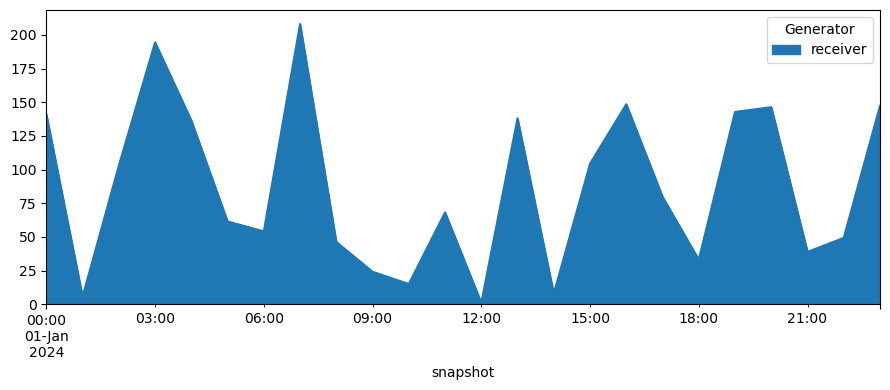

In [10]:
n.generators_t.p.plot.area(figsize=(9, 4))
plt.tight_layout()

<AxesSubplot:xlabel='snapshot'>

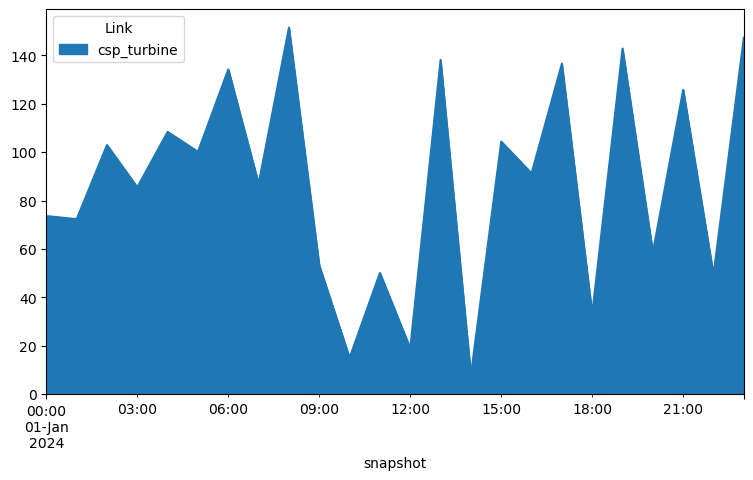

In [11]:
n.links_t.p0.plot.area(figsize=(9, 5))

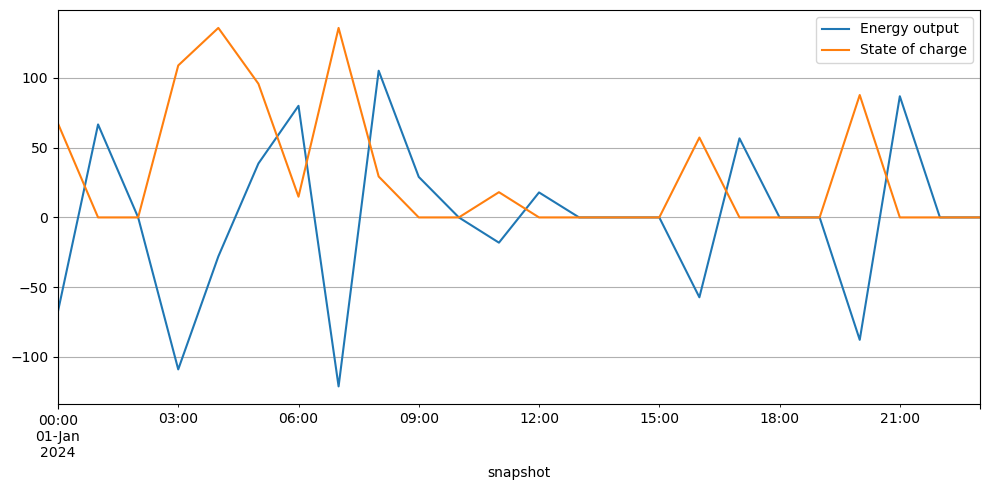

In [12]:
df = pd.DataFrame({idx: n.stores_t[idx]['salt_tank'] for idx in ["p", "e"]})
df.plot(grid=True, figsize=(10, 5))
plt.legend(labels=["Energy output", "State of charge"])
plt.tight_layout()